In [1]:
import numpy as np
import pandas as pd
import folium as fl
import requests, csv

In [2]:
import time
 
localtime = time.localtime(time.time())
t = str(localtime.tm_mday)+'_'+str(localtime.tm_mon)+'_'+str(localtime.tm_year)

In [3]:
csv_name = 'London_cov_'+t+'.csv'
csv_file = open(csv_name, 'w', newline='')
writer = csv.writer(csv_file)
writer.writerow(['District', 'cases', 'rate'])

21

In [4]:
res = requests.get('https://api.coronavirus.data.gov.uk/v1/data?filters=areaType=utla&latestBy=newCasesBySpecimenDateRollingRate&structure=%7B%22areaName%22:%22areaName%22,%22newCasesBySpecimenDateRollingSum%22:%22newCasesBySpecimenDateRollingSum%22,%22newCasesBySpecimenDateRollingRate%22:%22newCasesBySpecimenDateRollingRate%22%7D')
json_cov = res.json()
list_cov = json_cov['data']

list_lon = ['Westminster', 'Kensington and Chelsea',
    'Hammersmith and Fulham', 'Wandsworth', 'Lambeth', 'Southwark',
    'Tower Hamlets', 'Islington', 'Camden', 'Brent', 'Ealing', 'Hounslow',
    'Richmond upon Thames', 'Kingston upon Thames', 'Merton', 'Sutton',
    'Croydon', 'Bromley', 'Lewisham', 'Greenwich', 'Bexley', 'Havering',
    'Barking and Dagenham', 'Redbridge', 'Newham', 'Waltham Forest',
    'Haringey', 'Enfield', 'Barnet', 'Harrow', 'Hillingdon']

for x in list_cov:
    if x['areaName'] == 'Hackney and City of London':
        writer.writerow(['Hackney', 'NaN', x['newCasesBySpecimenDateRollingRate']])
        writer.writerow(['City of London', x['newCasesBySpecimenDateRollingSum'], x['newCasesBySpecimenDateRollingRate']])

for x in list_cov:
    if x['areaName'] in list_lon:
        name = x['areaName']
        cases = x['newCasesBySpecimenDateRollingSum']
        rate = x['newCasesBySpecimenDateRollingRate']
        writer.writerow([name, cases, rate])

csv_file.close()

In [5]:
df_cov = pd.read_csv('London_cov_'+t+'.csv')
print('Dataset read into a pandas dataframe!')

Dataset read into a pandas dataframe!


In [6]:
lon_geo = r'https://skgrange.github.io/www/data/london_boroughs.json'

In [7]:
lon_map = fl.Map(location=[51.509865, -0.118092], zoom_start=10)

fl.Choropleth(
    geo_data=lon_geo,
    name='choropleth',
    data=df_cov,
    columns=['District', 'rate'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Rate per 100,000 population'
).add_to(lon_map)

lon_map

In [9]:
lat = input('please enter your latitude: ')
log = input('please enter your longitude: ')
fl.Marker([lat,log], popup='your location').add_to(lon_map)

lon_map

please enter your latitude:  51
please enter your longitude:  0


In [10]:
df_cov.drop([0,0], axis=0, inplace=True)
df_cov.iloc[0,0] = 'City of London and Hackney'
df_cov.set_index('District', inplace=True)

In [11]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [12]:
df_plot = df_cov.drop(['rate'], axis=1)
df_plot = df_plot.sort_values(['cases'], axis=0)

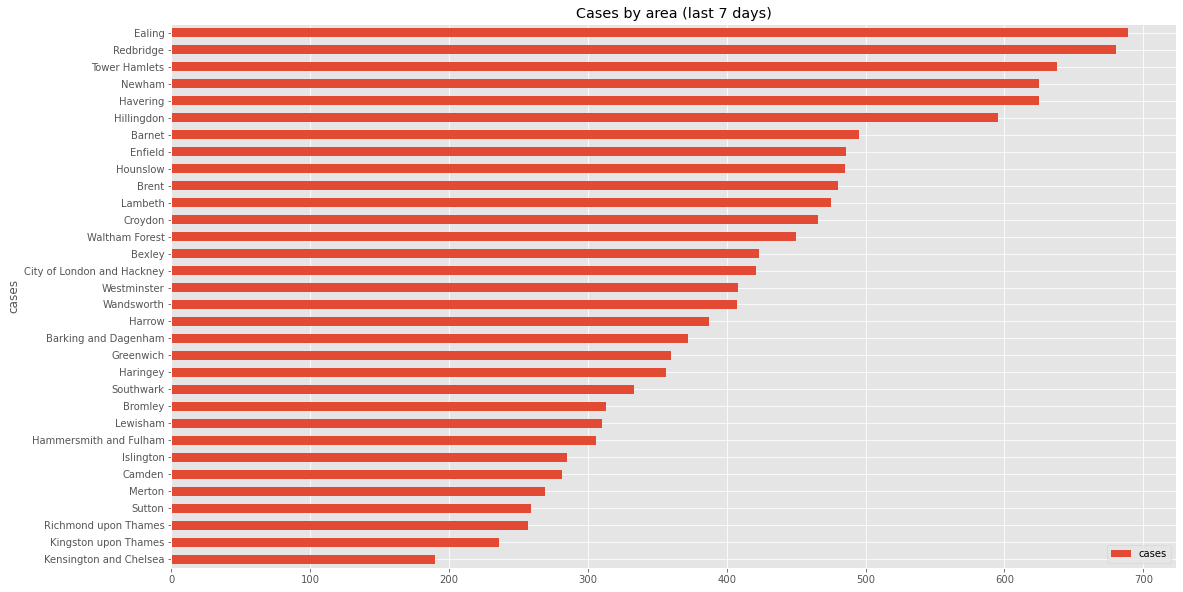

In [13]:
df_plot.plot(kind='barh', figsize=(18, 10))
plt.ylabel('cases')
plt.title('Cases by area (last 7 days)')

plt.show()